In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error


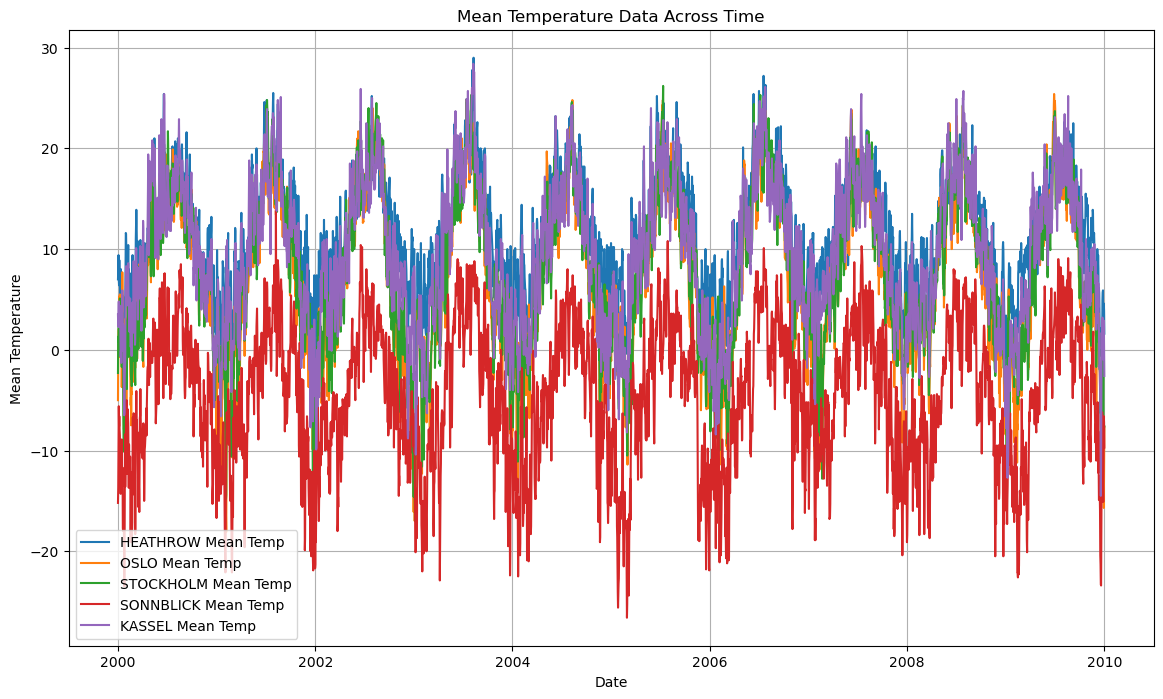

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weather_prediction_dataset.csv')

# Convert the DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Select cities
cities = ['HEATHROW', 'OSLO', 'STOCKHOLM', 'SONNBLICK', 'KASSEL']

# Plot mean temperature data for selected cities
plt.figure(figsize=(14, 8))

for city in cities:
    plt.plot(data.index, data[f'{city}_temp_mean'], label=f'{city} Mean Temp')

plt.title('Mean Temperature Data Across Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weather_prediction_dataset.csv')
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')
df.head(6)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7


/var/folders/qy/7tndsns52jjg178s5f1n30l80000gn/T/ipykernel_88945/3738005922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heathrow['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];


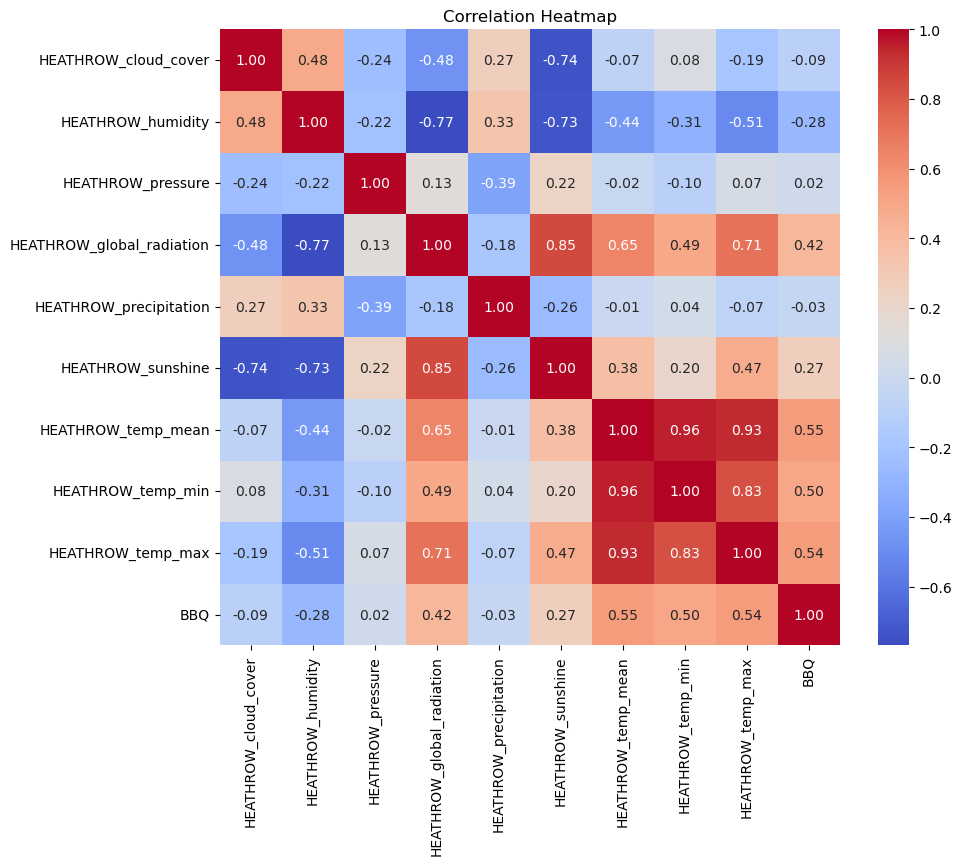

In [12]:
df.columns[51:60]
df_heathrow = df[['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure',
       'HEATHROW_global_radiation', 'HEATHROW_precipitation',
       'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min',
       'HEATHROW_temp_max']]
df_heathrow['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];

df_heathrow.head()

plt.figure(figsize=(10, 8))
sns.heatmap(df_heathrow.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.5.0


In [4]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


ModuleNotFoundError: No module named 'tensorflow'

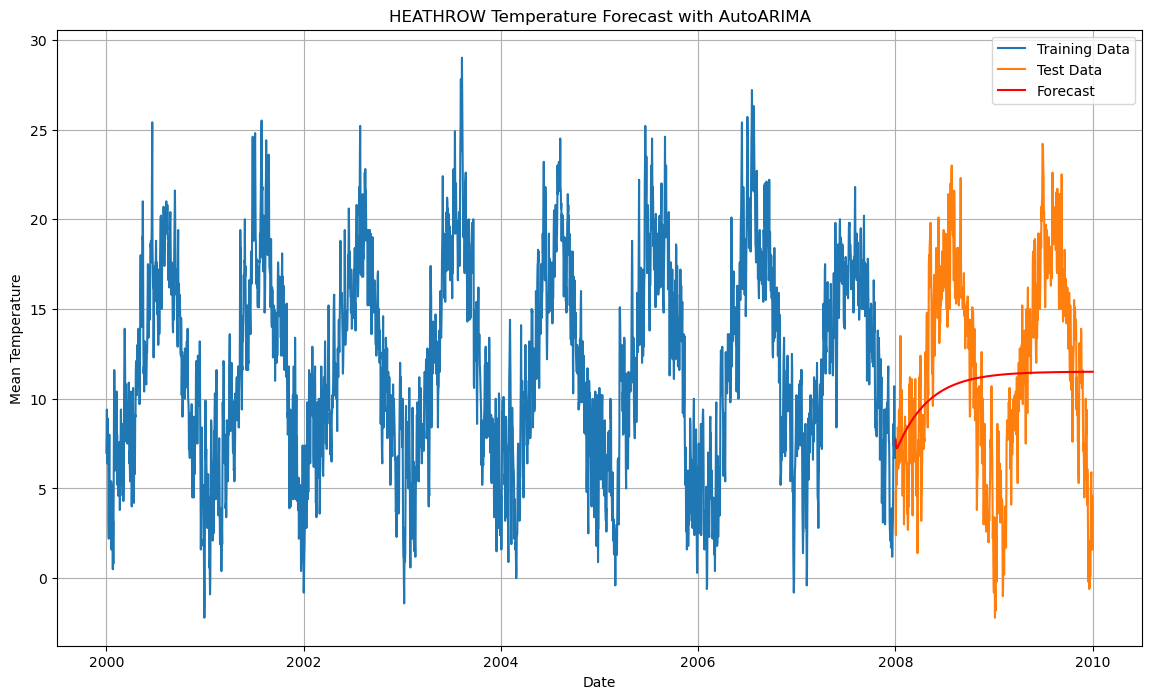

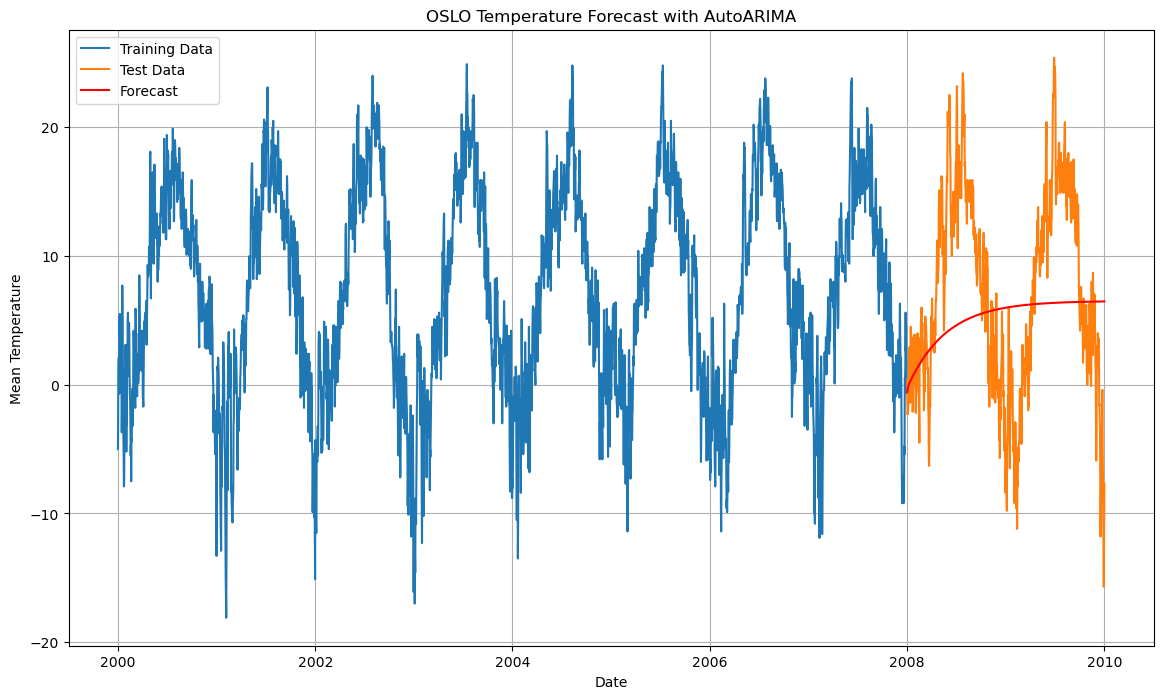

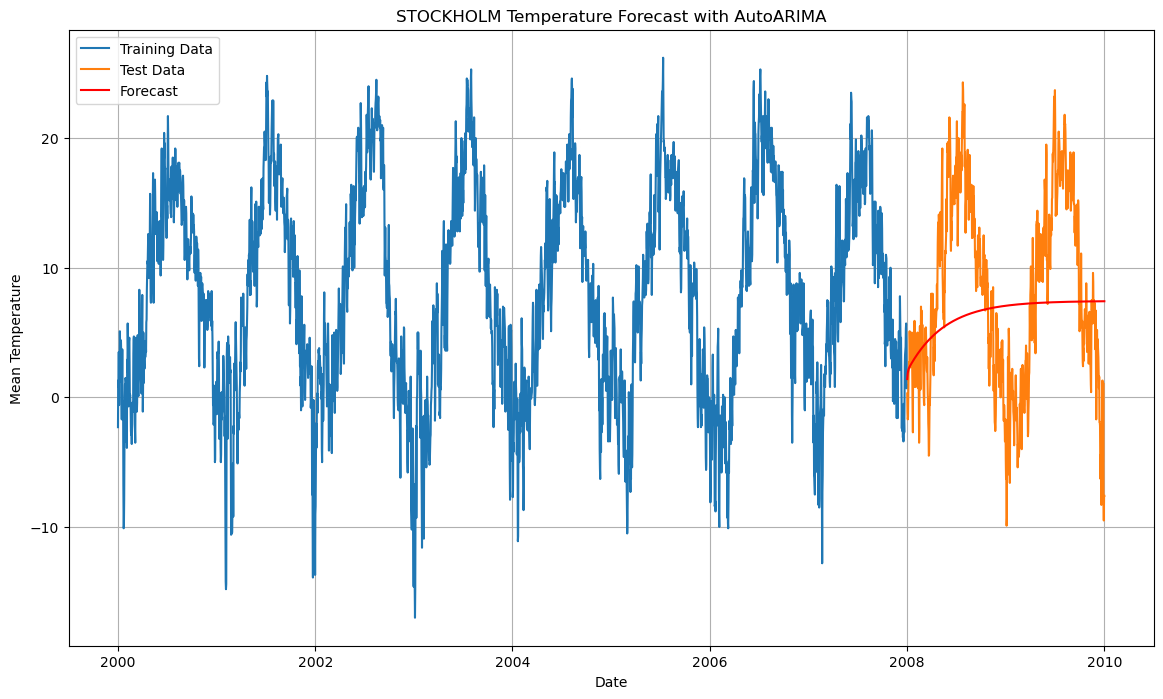

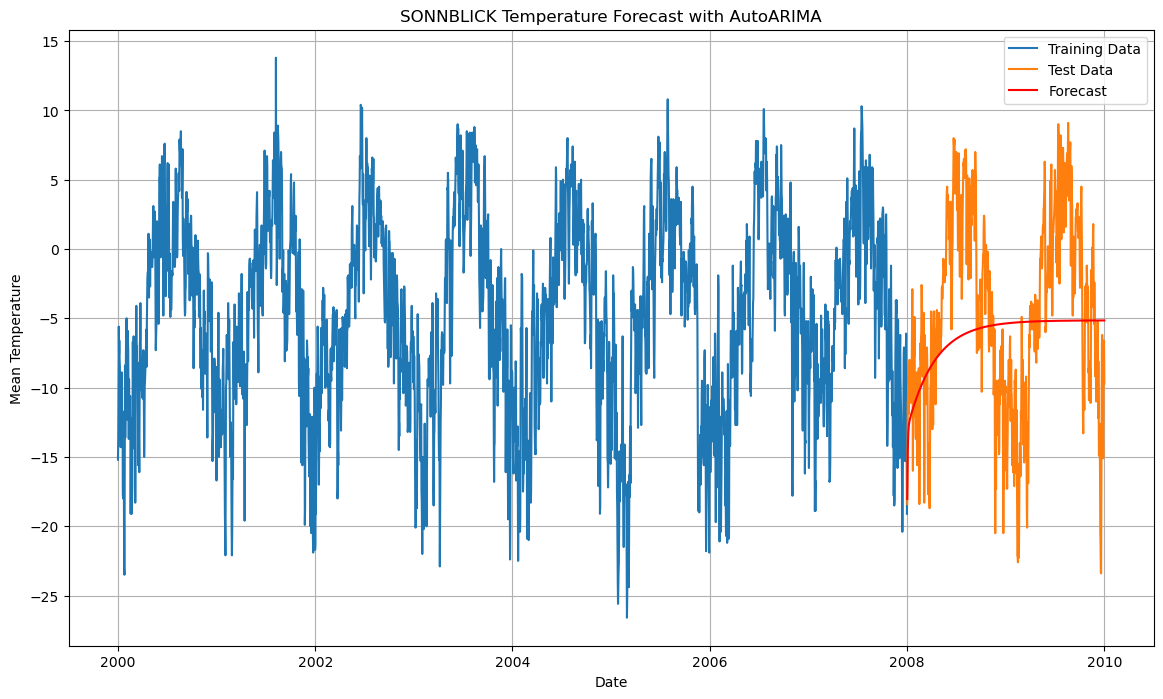

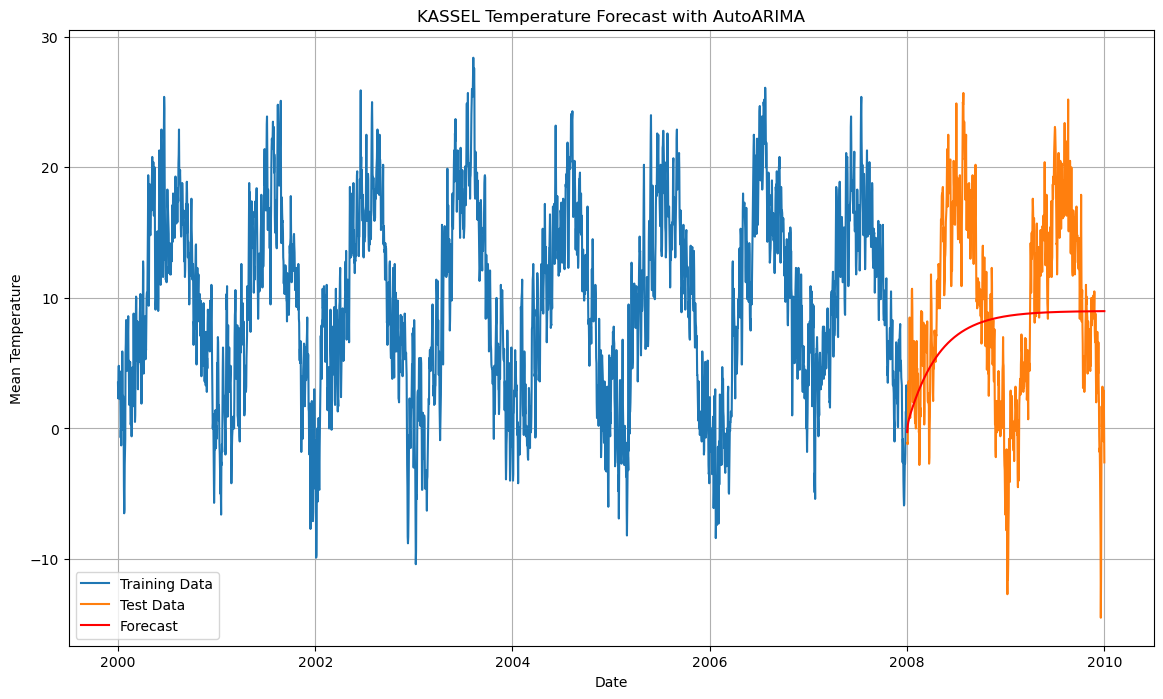

HEATHROW AutoARIMA RMSE: 5.5211
OSLO AutoARIMA RMSE: 7.9991
STOCKHOLM AutoARIMA RMSE: 7.3513
SONNBLICK AutoARIMA RMSE: 7.0386
KASSEL AutoARIMA RMSE: 7.4550


In [8]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weather_prediction_dataset.csv')

# Convert the DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Select cities
cities = ['HEATHROW', 'OSLO', 'STOCKHOLM', 'SONNBLICK', 'KASSEL']
results = {}

for city in cities:
    target_column = f'{city}_temp_mean'
    
    # Train/Test split (80% training, 20% testing)
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    
    # AutoARIMA - Automatically find the best ARIMA parameters
    model = auto_arima(train[target_column], 
                       seasonal=False, 
                       stepwise=True, 
                       suppress_warnings=True,
                       trace=False)
    
    # Make predictions
    forecast = model.predict(n_periods=len(test))
    
    # Evaluate accuracy
    rmse = np.sqrt(mean_squared_error(test[target_column], forecast))
    results[city] = {'forecast': forecast, 'rmse': rmse}
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(train.index, train[target_column], label='Training Data')
    plt.plot(test.index, test[target_column], label='Test Data')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.title(f'{city} Temperature Forecast with AutoARIMA')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print RMSE results for each city
for city, result in results.items():
    print(f'{city} AutoARIMA RMSE: {result["rmse"]:.4f}')


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
data = pd.read_csv('weather_prediction_dataset.csv')

# Convert the DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Select cities
cities = ['HEATHROW', 'OSLO', 'STOCKHOLM', 'SONNBLICK', 'KASSEL']
results = {}

for city in cities:
    target_column = f'{city}_temp_mean'
    
    # Preparing the data
    dataset = data[[target_column]].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create training data with 60 timesteps
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    def create_dataset(dataset, time_step=1):
        X, Y = [], []
        for i in range(len(dataset) - time_step - 1):
            a = dataset[i:(i + time_step), 0]
            X.append(a)
            Y.append(dataset[i + time_step, 0])
        return np.array(X), np.array(Y)

    time_step = 60
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=1)

    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform predictions and actual values to original scale
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform([y_test])

    # Evaluate accuracy
    rmse = np.sqrt(mean_squared_error(y_test[0], test_predict))
    results[city] = {'test_predict': test_predict, 'rmse': rmse}

    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(data.index[:train_size], scaler.inverse_transform(train_data), label='Training Data')
    plt.plot(data.index[train_size + time_step:], y_test[0], label='Test Data')
    plt.plot(data.index[train_size + time_step:], test_predict, label='LSTM Forecast', color='red')
    plt.title(f'{city} Temperature Forecast with LSTM')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print RMSE results for each city
for city, result in results.items():
    print(f'{city} LSTM RMSE: {result["rmse"]:.4f}')


ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
# Define CNN architecture

class CNN(nn.Module):
    """
    A Convolutional Neural Network (CNN) for classifying MNIST images.
    
    The network consists of a feature extraction architecture and a 
    classification architecture. The feature-extraction architecture includes
    two convolutional layers. Each of the convolutional layers is followed by 
    a sigmoid activation and a max pooling layer. The classification 
    architecture includes two fully connected layers for classification.

    Attributes:
    conv1 : torch.nn.Conv2d
        The first convolutional layer
    conv2 : torch.nn.Conv2d
        The second convolutional layer
    activation : torch.nn activation function
        Activation function used for input and hidden layers
    pool : torch.nn.MaxPool2d
        The pooling layer
    fc1 : torch.nn.Linear
        The first fully connected layer
    fc2 : torch.nn.Linear
        The second fully connected layer

    Methods:
    __init__(self): 
        This function creates an instance of this class.
    forward(self, x):
        Performs a forward pass for an input x.
    """

    def __init__(self):
        """
        Initialize the CNN model by defining its layers.
        """
        # Create an instance of the parent class `nn.Module`
        super(CNN, self).__init__()

        # `self.name = object` creates an attribute with the name `name` for 
        # our the newly created instance of our class, and it assigns that
        # attribute the value `object`. Example: For your first homework, you
        # could have create a class `TicTacToe`. Adding the line 
        # `self.is_game_over = False` to the instance-initialization function
        # of that class would ensure that everytime a new game of TicTacToe is 
        # initialized, it would have an attribute `is_game_over` and initially
        # the value of that attribute would be `False`. 
        # Here, we use the class-attribute syntax to create layers for our CNN.
        
        # Define the first convolutional layer. It uses a 8 filters of size 
        # 3-by-3 to turn a 1-channel image into an 8-channel image.         
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)

        # The MNIST images are grayscale images. Therefore, the input data for
        # out CNN has only one channel. Color images typically come with three
        # channels: a red channel, a green channel, and a blue channel. 
        # Throughout the feature extraction, the number of channels typically 
        # changes quite drastically. The channels of the transformed features
        # typically do not correspond to colors anymore. Instead, different
        # channels of the transformed image contain different information about
        # the original image. For example, a channel created by applying an
        # edge-detection filter would have information about the locations of 
        # sharp edges. A channel created by applying a blur filter would have
        # information about the coarse-grained distribution of light and dark
        # patches.
        
        # Define the second convolutional layer. It uses 16 filters of size 
        # 3-by-3 to turn a 8-channel image into an 16-channel image.
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        # Define the activation function
        self.activation = nn.Sigmoid()
        # Define a pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        # Define a fully connected layer hidden with 128 nodes
        # Inputs are num_channels in previous layer x image height x image width
        self.fc1 = nn.Linear(16 * 8 * 8, 128)
        # Define the output layer with 10 nodes
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        """
        Define the forward pass of the CNN.

        Parameters:
        x : torch.Tensor
            The input tensor containing the image batch.

        Returns:
        torch.Tensor
            The output tensor containing the class scores for each image.
        """
        # Pass the input through the first convolutional layer, then apply activation
        x = self.activation(self.conv1(x))
        # Pass the input through the first pooling layer
        x = self.pool(x)
        # Pass the input through the second convolutional layer, then apply activation
        x = self.activation(self.conv2(x))
        # Pass the input through the second pooling layer
        x = self.pool(x)     
        # Change the shape of x into a 1d array
        x = x.view(-1, 16 * 8 * 8)
        # Pass the input through the full connected hidden layer, then apply activation
        x = self.activation(self.fc1(x))
        # Pass the input through the last layer
        x = self.fc2(x)
        return x

In [ ]:
# Define training pipeline including validation after each epoch

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    """
    Train the CNN model.

    Parameters:
    model : torch.nn.Module
        The CNN model to be trained.
    train_loader : torch.utils.data.DataLoader
        The data loader for the training set.
    val_loader : torch.utils.data.DataLoader
        The data loader for the validation set.
    criterion : torch.nn.modules.loss._Loss
        The loss function to be used.
    optimizer : torch.optim.Optimizer
        The optimizer to be used.
    epochs : int
        The number of epochs for training.

    Returns:
    tuple
        A tuple containing lists of training loss, validation loss, training accuracy, and validation accuracy.
    """
    # Initialize lists to store training and validation loss
    train_loss, val_loss = [], []
    # Initialize lists to store training and validation and accuracy
    train_acc, val_acc = [], []

    # Loop over the number of epochs
    for epoch in range(epochs):
        # Set the model to training mode
        model.train()  
        # Initialize the running loss for the epoch
        running_loss = 0.0  
        # Initialize counters for correct predictions and total samples
        correct, total = 0, 0  

        # Learning algorithm is SGD with minibatch. Iterating over the dataload
        # returns images and labels in batches.
        
        # Iterate over batches of training data
        for images, labels in train_loader:
            # Zero the gradients to prevent accumulation from previous iterations
            optimizer.zero_grad()  
            # Perform a forward pass through the model to get predictions
            outputs = model(images)  
            # Compute the loss between predictions and true labels
            loss = criterion(outputs, labels)  
            # Perform a backward pass to compute gradients via backpropagation
            loss.backward()  
            # Update model parameters based on the computed gradients
            optimizer.step()  

            # Add up the loss
            running_loss += loss.item()  
            # Get the predicted class with the highest score
            _, predicted = torch.max(outputs.data, 1)  
            # Update the total number of samples
            total += labels.size(0)  
            # Update the number of correct predictions
            correct += (predicted == labels).sum().item()  

        # Compute and store the average training loss for the epoch
        train_loss.append(running_loss / len(train_loader))  
        # Compute and store the training accuracy for the epoch
        train_acc.append(100 * correct / total)  

        # Set the model to evaluation mode
        model.eval()  
        # Initialize the running loss for validation
        val_running_loss = 0.0  
        #  Initialize counters for correct predictions and total samples in validation
        val_correct, val_total = 0, 0  
        
        # Disable gradient calculation for validation to save memory and computation
        with torch.no_grad():
            # Iterate over batches of validation data
            for images, labels in val_loader:
                # Perform a forward pass through the model to get predictions
                outputs = model(images)  
                # Compute the loss between predictions and true labels
                loss = criterion(outputs, labels)  
                # Add up the loss
                val_running_loss += loss.item()  
                # Get the predicted class with the highest score
                _, predicted = torch.max(outputs.data, 1)  
                # Update the total number of samples in validation
                val_total += labels.size(0)  
                # Update the number of correct predictions in validation
                val_correct += (predicted == labels).sum().item()  

        # Compute and store the average validation loss for the epoch
        val_loss.append(val_running_loss / len(val_loader))
        # Compute and store the validation accuracy for the epoch
        val_acc.append(100 * val_correct / val_total)  
        
        # Print the results for the current epoch, including training and validation loss and accuracy
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_running_loss / len(val_loader):.4f}, '
              f'Train Acc: {100 * correct / total:.2f}%, Val Acc: {100 * val_correct / val_total:.2f}%')
        
    # Return the lists of training and validation loss and accuracy
    return train_loss, val_loss, train_acc, val_acc  

In [ ]:
# Build and train a model

# Create model
model = CNN()

# Set loss function
criterion = nn.CrossEntropyLoss()

# Set training algorithm
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer)

In [ ]:
# Plot training & validation accuracy/loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Evaluate the model on test set

model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f'Test Accuracy: {test_acc:.2f}%')